In [1]:
import numpy as np
import scipy.spatial as sp
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def get_sphere(n):
    """get_sphere(n) discretized a sphere using a Fibonacci lattice with midpoint intertion (and poles added by hand)
       input parameters:
       n (int) number of points in the discretization (including poles)
       returns:       
       sphere <class 'scipy.spatial._qhull.ConvexHull'> with points and triangulation according to convex hull
              (check https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html)
       phi (numpy array, len=n) array with phi angles 
       theta (numpy array, len=n) array with theta angles        
       
       more info in "Measurement of Areas on a Sphere Using Fibonacci and Latitude–Longitude Lattices" by
        Alvaro Gonzalez, Math Geosci (2010) 42: 49–64, DOI 10.1007/s11004-009-9257-x. 
        Check also https://extremelearning.com.au/how-to-evenly-distribute-points-on-a-sphere-more-effectively-than-the-canonical-fibonacci-lattice/
    """
    import numpy as np
    import scipy.spatial as sp
    #Golden ratio
    gr=(1.+np.sqrt(5.))/2.
    #ng=number of points by Fibonacci lattice with midpoint insertion
    ng=n-2
    i=np.arange(ng,dtype=int)
    phi=np.zeros(n)
    theta=np.zeros(n)
    phi[1:ng+1]=2*np.pi*i/gr
    theta[1:ng+1]=np.arccos(1.-2*(i+0.5)/ng)
    #adding poles by hand
    phi[0]=0.
    theta[0]=0.
    phi[n-1]=0.
    theta[n-1]=np.pi
    #getting Cartesian coordinates
    points=np.zeros((n,3))    
    sin_arr=np.sin(theta)
    points[:,0]=np.cos(phi)*sin_arr
    points[:,1]=np.sin(phi)*sin_arr
    points[:,2]=np.cos(theta)
    #getting convex hull
    sphere=sp.ConvexHull(points)
    
    
    return sphere,phi,theta


In [3]:
sphere,phi,theta=get_sphere(2000)

In [4]:
#checking 
print('type(sphere)',type(sphere))
print('type(sphere.points)',type(sphere.points))
print('sphere.points.shape',sphere.points.shape)
print('sphere.simplices.shape',sphere.simplices.shape)
print('phi.shape',phi.shape)
print('theta.shape',theta.shape)
print('point 0, theta, phi=',sphere.points[0,:],theta[0],phi[0])
print('point n, theta, phi=',sphere.points[-1,:],theta[-1],phi[-1])

type(sphere) <class 'scipy.spatial._qhull.ConvexHull'>
type(sphere.points) <class 'numpy.ndarray'>
sphere.points.shape (2000, 3)
sphere.simplices.shape (3996, 3)
phi.shape (2000,)
theta.shape (2000,)
point 0, theta, phi= [0. 0. 1.] 0.0 0.0
point n, theta, phi= [ 1.2246468e-16  0.0000000e+00 -1.0000000e+00] 3.141592653589793 0.0


In [5]:
#to get info about the sphere (which is a convex hull)
#sphere?

In [6]:
#accuracy on the volume (the convex hull is actually the sphere)
print('hull volume=',sphere.volume)
real_vol=4./3*np.pi
print('real volume=',real_vol)
print('error (%)=',np.abs(1-sphere.volume/real_vol)*100)

hull volume= 4.1766251390452105
real volume= 4.1887902047863905
error (%)= 0.29041955186199786


<IPython.core.display.Javascript object>


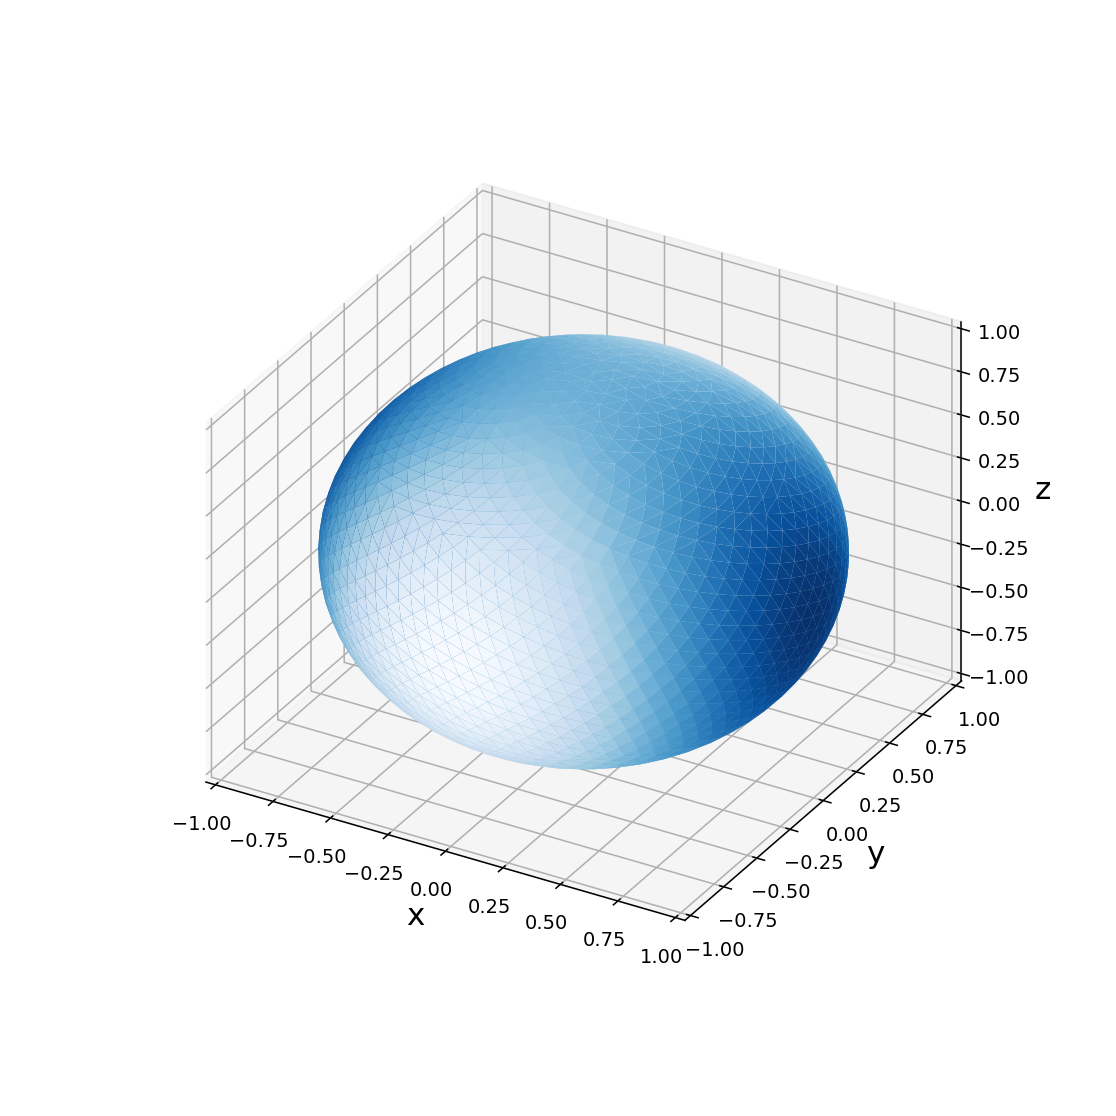

In [7]:
#plotting
ax = plt.figure(figsize=(8,8)).add_subplot(projection='3d')
ax.set_proj_type('ortho') 
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
ax.set_zlim((-1,1))
ax.set_xlabel('x', size=16)
ax.set_ylabel('y', size=16)
ax.set_zlabel('z', size=16)
#name=str(ind_set)
#for i in range(1,sphere.simplices.shape[0]):
#    ax.plot_trisurf(sphere.points[:,0],sphere.points[:,1] , sphere.points[:,2],
#                triangles=sphere.simplices[:i,:], linewidth=1.,
#                    color='b',antialiased=True, shade=False)
#    name=str(i)
#    plt.savefig("plot_"+name+".png", dpi=150)

#setting the color of each triangle
colors=np.zeros(sphere.simplices.shape[0])
for i in range(sphere.simplices.shape[0]):
    ind=sphere.simplices[i,:]
    for k in ind:
        colors[i]+=sphere.points[k,0]**2-sphere.points[k,1]**2
    
    
cmap = plt.get_cmap('Blues')

#shape=ax.plot_trisurf(sphere.points[:,0],sphere.points[:,1] , sphere.points[:,2],
#                triangles=sphere.simplices, linewidth=1.,
#                antialiased=True,edgecolors="black",cmap=cmap )

shape=ax.plot_trisurf(sphere.points[:,0],sphere.points[:,1] , sphere.points[:,2],
                triangles=sphere.simplices, shade=False,edgecolors=None,linewidth=0,
                antialiased=True,cmap=cmap )


shape.set_array(colors)  #this is crucial: sets the color of each triangle (no gradients unfortunately)
shape.autoscale()
plt.savefig("plot_.png", dpi=150)    


#ax.set_title(string_title)

plt.show()
